## Travel Review Ratings Data Set Analysis
Abstract: Google reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.<br>

Data Set Information:<br>
This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

<br>
Attribute Information:<br>
Attribute 1 : Unique user id <br>
Attribute 2 : Average ratings on churches <br>
Attribute 3 : Average ratings on resorts <br>
Attribute 4 : Average ratings on beaches <br>
Attribute 5 : Average ratings on parks <br>
Attribute 6 : Average ratings on theatres <br>
Attribute 7 : Average ratings on museums <br>
Attribute 8 : Average ratings on malls <br>
Attribute 9 : Average ratings on zoo <br>
Attribute 10 : Average ratings on restaurants <br>
Attribute 11 : Average ratings on pubs/bars <br>
Attribute 12 : Average ratings on local services<br> 
Attribute 13 : Average ratings on burger/pizza shops<br> 
Attribute 14 : Average ratings on hotels/other lodgings <br>
Attribute 15 : Average ratings on juice bars <br>
Attribute 16 : Average ratings on art galleries <br>
Attribute 17 : Average ratings on dance clubs <br>
Attribute 18 : Average ratings on swimming pools <br>
Attribute 19 : Average ratings on gyms <br>
Attribute 20 : Average ratings on bakeries <br>
Attribute 21 : Average ratings on beauty & spas<br> 
Attribute 22 : Average ratings on cafes <br>
Attribute 23 : Average ratings on view points<br> 
Attribute 24 : Average ratings on monuments <br>
Attribute 25 : Average ratings on gardens<br>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./google_review_ratings.csv')
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


## Data Preprocessing
Deal with the NaN data.

In [6]:
df.isna().sum() # Count the number of NaN data of each column.

User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    1
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    1
dtype: int64

In [7]:
df.fillna(0, inplace=True)  # Fill 0 to the NaN data

In [8]:
df.isna().sum()  # See whether there still exist NaN data

User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64

因為之後想要使用K-means分群，所以先確認每一筆資料都是numerical

In [9]:
df.info()   #user是object合理，但是Category 11竟然是object?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
User           5456 non-null object
Category 1     5456 non-null float64
Category 2     5456 non-null float64
Category 3     5456 non-null float64
Category 4     5456 non-null float64
Category 5     5456 non-null float64
Category 6     5456 non-null float64
Category 7     5456 non-null float64
Category 8     5456 non-null float64
Category 9     5456 non-null float64
Category 10    5456 non-null float64
Category 11    5456 non-null object
Category 12    5456 non-null float64
Category 13    5456 non-null float64
Category 14    5456 non-null float64
Category 15    5456 non-null float64
Category 16    5456 non-null float64
Category 17    5456 non-null float64
Category 18    5456 non-null float64
Category 19    5456 non-null float64
Category 20    5456 non-null float64
Category 21    5456 non-null float64
Category 22    5456 non-null float64
Category 23    5456 non-null float64
Categor

In [10]:
df["Category 11"] = pd.to_numeric(df["Category 11"],errors='coerce') #將Category 11轉乘float64

df.info()  #再次確認

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
User           5456 non-null object
Category 1     5456 non-null float64
Category 2     5456 non-null float64
Category 3     5456 non-null float64
Category 4     5456 non-null float64
Category 5     5456 non-null float64
Category 6     5456 non-null float64
Category 7     5456 non-null float64
Category 8     5456 non-null float64
Category 9     5456 non-null float64
Category 10    5456 non-null float64
Category 11    5455 non-null float64
Category 12    5456 non-null float64
Category 13    5456 non-null float64
Category 14    5456 non-null float64
Category 15    5456 non-null float64
Category 16    5456 non-null float64
Category 17    5456 non-null float64
Category 18    5456 non-null float64
Category 19    5456 non-null float64
Category 20    5456 non-null float64
Category 21    5456 non-null float64
Category 22    5456 non-null float64
Category 23    5456 non-null float64
Catego

In [11]:
print('Before:\n',df.isna().sum())  #發現Category 11有NaN 所以上述去除NaN的動作再做一次
df.fillna(0, inplace=True)
print('After:\n',df.isna().sum())

Before:
 User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    1
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64
After:
 User           0
Category 1     0
Category 2     0
Category 3     0
Category 4     0
Category 5     0
Category 6     0
Category 7     0
Category 8     0
Category 9     0
Category 10    0
Category 11    0
Category 12    0
Category 13    0
Category 14    0
Category 15    0
Category 16    0
Category 17    0
Category 18    0
Category 19    0
Category 20    0
Category 21    0
Category 22    0
Category 23    0
Category 24    0
dtype: int64


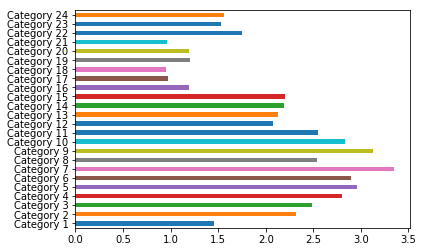

In [40]:
df.std(axis=0).plot(kind='barh')
df.mean(axis=0).plot(kind='barh')

In [14]:
X = np.array(df.drop(['User'], 1).astype(float)) #drop User Id
X

array([[0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.94, 5.  , 4.03, ..., 5.  , 5.  , 1.11],
       [0.95, 4.05, 4.05, ..., 5.  , 5.  , 1.12],
       [0.95, 4.07, 5.  , ..., 5.  , 5.  , 1.17]])

因為這筆資料並沒有明確分類(do not have any class labels)，因此使用unsupervised learning進行分群，以下使用K Means

## K Means

In [15]:
from sklearn.cluster import KMeans

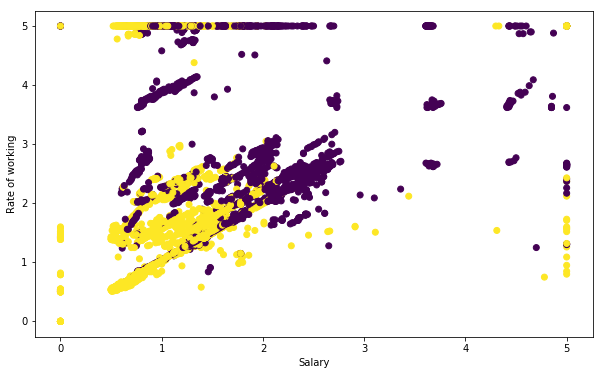

In [39]:
km = KMeans(n_clusters=2,init='random')  #K=2群
y_pred = km.fit_predict(X)
plt.figure(figsize=(10, 6))
plt.xlabel('Salary')
plt.ylabel('Rate of working')
plt.scatter(X[:, 0], X[:, 1], c=y_pred) #C是第三維度 已顏色做維度
plt.show()